In [610]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
sbn.set()
import math
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')


In [611]:
c_df = pd.read_csv('car/car.csv', header = 0)
c_df.head()
#c_df

,buying,maint,doors,persons,lug_boot,safety,category
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc



### UCI Machine Learning repository:
http://archive.ics.uci.edu/ml/datasets/Car+Evaluation

#### Data description:
1. 1728 Instances
2. 6 attributes
##### Attribute values:
* buying:
    - v-high, high, med, low
* maint:
    - v-high, high, med, low
* doors:
    - 2,3,4,5-more
* persons:
    - 2,4, more
* lug_boot:
    - small, med, big
* safety:
    - low, med, high

3. calssified into three intermediate concepts: Price, Comfort, Safety


### Class Distribution

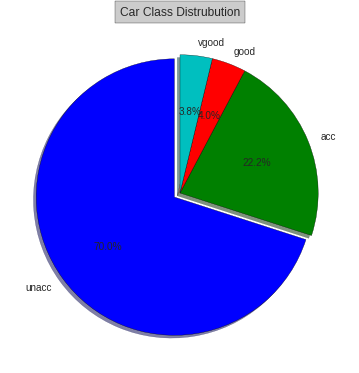

In [612]:
from pylab import *
figure(1, figsize = (6,6))
ax = axes([0.1,0.1,0.8,0.8])
labels = 'unacc', 'acc', 'good', 'vgood'
fracs = [70.023, 22.222, 3.993, 3.762]
explode=(0.05, 0, 0, 0)

pie(fracs, explode=explode, labels=labels,
                autopct='%1.1f%%', shadow=True, startangle=90)
                
title('Car Class Distrubution', bbox={'facecolor':'0.8', 'pad':5})

show()

##### 70% of cars in the dataset of 1728 instances are labeled unacceptable. 
###### Is price  a factor for unacceptance?

### Undestanding dataset 
### Buying cost

In [613]:

b_vh_un = 0
b_vh_ac = 0
b_vh_go = 0
b_vh_vg = 0

b_h_un = 0
b_h_ac = 0
b_h_go = 0
b_h_vg = 0

b_m_un = 0
b_m_ac = 0
b_m_go = 0
b_m_vg = 0

b_l_un = 0
b_l_ac = 0
b_l_go = 0
b_l_vg = 0

for val in c_df.iterrows():
    if (val[1].buying == 'vhigh' and val[1].category == 'unacc'):
        b_vh_un += 1
    elif (val[1].buying == 'vhigh' and val[1].category == 'acc'):
        b_vh_ac += 1
    elif (val[1].buying == 'vhigh' and val[1].category == 'good'):
        b_vh_go += 1
    elif (val[1].buying == 'vhigh' and val[1].category == 'vgood'):
        b_vh_vg += 1
        
        
    elif (val[1].buying == 'high' and val[1].category == 'unacc'):
        b_h_un += 1
    elif (val[1].buying == 'high' and val[1].category == 'acc'):
        b_h_ac += 1
    elif (val[1].buying == 'high' and val[1].category == 'good'):
        b_h_go += 1
    elif (val[1].buying == 'high' and val[1].category == 'vgood'):
        b_h_vg += 1
        
        
    elif (val[1].buying == 'med' and val[1].category == 'unacc'):
        b_m_un += 1
    elif (val[1].buying == 'med' and val[1].category == 'acc'):
        b_m_ac += 1
    elif (val[1].buying == 'med' and val[1].category == 'good'):
        b_m_go += 1
    elif (val[1].buying == 'med' and val[1].category == 'vgood'):
        b_m_vg += 1
        
    elif (val[1].buying == 'low' and val[1].category == 'unacc'):
        b_l_un += 1
    elif (val[1].buying == 'low' and val[1].category == 'acc'):
        b_l_ac += 1
    elif (val[1].buying == 'low' and val[1].category == 'good'):
        b_l_go += 1
    else:
        b_l_vg += 1
                        
    
print("Very High price and unacceptable: ", b_vh_un)
print("Very High price and acceptable : ", b_vh_ac)
print("Very High price and good : ", b_vh_go)
print("Very High price and vgood : ", b_vh_vg)
print()

print("High price and unacceptable: ", b_h_un)
print("High price and acceptable : ", b_h_ac)
print("High price and good : ", b_h_go)
print("High price and vgood : ", b_h_vg)
print()

print("Medium price and unacceptable: ", b_m_un)
print("Medium price and acceptable : ", b_m_ac)
print("Medium price and good : ", b_m_go)
print("Medium maintenance and vgood : ", b_m_vg)
print()

print("Low price and unacceptable: ", b_l_un)
print("Low price and acceptable : ", b_l_ac)
print("Low price and good : ", b_l_go)
print("Low price and vgood : ", b_l_vg)

Very High price and unacceptable:  360
Very High price and acceptable :  72
Very High price and good :  0
Very High price and vgood :  0

High price and unacceptable:  324
High price and acceptable :  108
High price and good :  0
High price and vgood :  0

Medium price and unacceptable:  268
Medium price and acceptable :  115
Medium price and good :  23
Medium maintenance and vgood :  26

Low price and unacceptable:  258
Low price and acceptable :  89
Low price and good :  46
Low price and vgood :  39


###### Observation: very high and high price do not have good or vgood rating while medium and low price have good and vgood rating but numbers are low

### Maintenance cost

In [614]:

m_vh_un = 0
m_vh_ac = 0
m_vh_go = 0
m_vh_vg = 0

m_h_un = 0
m_h_ac = 0
m_h_go = 0
m_h_vg = 0

m_m_un = 0
m_m_ac = 0
m_m_go = 0
m_m_vg = 0

m_l_un = 0
m_l_ac = 0
m_l_go = 0
m_l_vg = 0

for val in c_df.iterrows():
    if (val[1].maint == 'vhigh' and val[1].category == 'unacc'):
        m_vh_un += 1
    elif (val[1].maint == 'vhigh' and val[1].category == 'acc'):
        m_vh_ac += 1
    elif (val[1].maint == 'vhigh' and val[1].category == 'good'):
        m_vh_go += 1
    elif (val[1].maint == 'vhigh' and val[1].category == 'vgood'):
        m_vh_vg += 1
        
        
    elif (val[1].maint == 'high' and val[1].category == 'unacc'):
        m_h_un += 1
    elif (val[1].maint == 'high' and val[1].category == 'acc'):
        m_h_ac += 1
    elif (val[1].maint == 'high' and val[1].category == 'good'):
        m_h_go += 1
    elif (val[1].maint == 'high' and val[1].category == 'vgood'):
        m_h_vg += 1
        
        
    elif (val[1].maint == 'med' and val[1].category == 'unacc'):
        m_m_un += 1
    elif (val[1].maint == 'med' and val[1].category == 'acc'):
        m_m_ac += 1
    elif (val[1].maint == 'med' and val[1].category == 'good'):
        m_m_go += 1
    elif (val[1].maint == 'med' and val[1].category == 'vgood'):
        m_m_vg += 1
        
    elif (val[1].maint == 'low' and val[1].category == 'unacc'):
        m_l_un += 1
    elif (val[1].maint == 'low' and val[1].category == 'acc'):
        m_l_ac += 1
    elif (val[1].maint == 'low' and val[1].category == 'good'):
        m_l_go += 1
    else:
        m_l_vg += 1
        


print("Very High maintenance and unacceptable: ", b_vh_un)
print("Very High maintenance and acceptable : ", b_vh_ac)
print("Very High maintenance and good : ", b_vh_go)
print("Very High maintenance and vgood : ", b_vh_vg)
print()

print("High maintenance and unacceptable: ", b_h_un)
print("High maintenance and acceptable : ", b_h_ac)
print("High maintenance and good : ", b_h_go)
print("High maintenance and vgood : ", b_h_vg)
print()

print("Medium maintenance and unacceptable: ", b_m_un)
print("Medium maintenance and acceptable : ", b_m_ac)
print("Medium maintenance and good : ", b_m_go)
print("Medium maintenance and vgood : ", b_m_vg)
print()

print("Low maintenance and unacceptable: ", b_l_un)
print("Low maintenance and acceptable : ", b_l_ac)
print("Low maintenance and good : ", b_l_go)
print("Low maintenance and vgood : ", b_l_vg)

Very High maintenance and unacceptable:  360
Very High maintenance and acceptable :  72
Very High maintenance and good :  0
Very High maintenance and vgood :  0

High maintenance and unacceptable:  324
High maintenance and acceptable :  108
High maintenance and good :  0
High maintenance and vgood :  0

Medium maintenance and unacceptable:  268
Medium maintenance and acceptable :  115
Medium maintenance and good :  23
Medium maintenance and vgood :  26

Low maintenance and unacceptable:  258
Low maintenance and acceptable :  89
Low maintenance and good :  46
Low maintenance and vgood :  39


#### Observation: Buying and Maintenace cost have similar rating of cars

### Buying and Maintenace Cost and Car Rating in Bar graph Representation

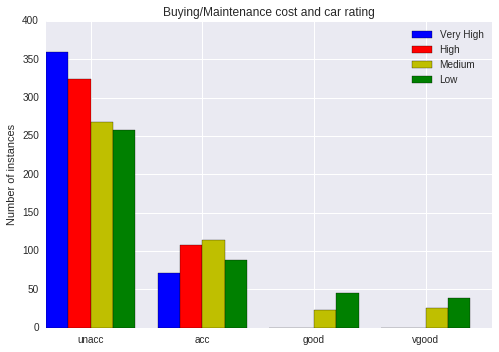

In [615]:
N = 4

ind = np.arange(N)
width = 0.20
fig, ax = plt.subplots()


very_high = (360,72,0,0)
rect1 = ax.bar(ind,very_high,width, color = 'b')

high = (324,108,0,0)
rect2 = ax.bar(ind+width,high,width, color = 'r')

medium = (268,115,23,26)
rect3 = ax.bar(ind+(2*width),medium,width, color = 'y')

low = (258,89,46,39)
rect4 = ax.bar(ind+(3*width),low,width, color = 'g')

ax.set_ylabel('Number of instances')
ax.set_title('Buying/Maintenance cost and car rating')
ax.set_xticks(ind+(2*width))
ax.set_xticklabels(('unacc','acc','good','vgood'))

ax.legend((rect1[0],rect2[1],rect3[2],rect4[3]),('Very High','High','Medium','Low'))


#### Observation: Medium and low buying and maintenace cost shows higher rating of car.
* Cost seems to play significant factor in rating a car.


### Does comfort of a car affects rating of a car?
#### Number of doors in a car


In [616]:

d_2_un = 0
d_2_ac = 0
d_2_go = 0
d_2_vg = 0

d_3_un = 0
d_3_ac = 0
d_3_go = 0
d_3_vg = 0

d_4_un = 0
d_4_ac = 0
d_4_go = 0
d_4_vg = 0

d_5_un = 0
d_5_ac = 0
d_5_go = 0
d_5_vg = 0

for val in c_df.iterrows():

        
        
    if (val[1].doors == '2' and val[1].category == 'unacc'):
        d_2_un += 1
    elif (val[1].doors == '2' and val[1].category == 'acc'):
        d_2_ac += 1
    elif (val[1].doors == '2' and val[1].category == 'good'):
        d_2_go += 1
    elif (val[1].doors == '2' and val[1].category == 'vgood'):
        d_2_vg += 1
        
        
    elif (val[1].doors == '3' and val[1].category == 'unacc'):
        d_3_un += 1
    elif (val[1].doors == '3' and val[1].category == 'acc'):
        d_3_ac += 1
    elif (val[1].doors == '3' and val[1].category == 'good'):
        d_3_go += 1
    elif (val[1].doors == '3' and val[1].category == 'vgood'):
        d_3_vg += 1
        
    elif (val[1].doors == '4' and val[1].category == 'unacc'):
        d_4_un += 1
    elif (val[1].doors == '4' and val[1].category == 'acc'):
        d_4_ac += 1
    elif (val[1].doors == '4' and val[1].category == 'good'):
        d_4_go += 1
    elif (val[1].doors == '4' and val[1].category == 'vgood'):
        d_4_vg += 1
    
    elif (val[1].doors == '5more' and val[1].category == 'unacc'):
        d_5_un += 1
    elif (val[1].doors == '5more' and val[1].category == 'acc'):
        d_5_ac += 1
    elif (val[1].doors == '5more' and val[1].category == 'good'):
        d_5_go += 1
    elif (val[1].doors == '5more' and val[1].category == 'vgood'):
        d_5_vg += 1
        

print("2 doors and unacceptable: ", d_2_un)
print("2 doors and acceptable : ", d_2_ac)
print("2 doors and good : ", d_2_go)
print("2 doors and vgood : ", d_2_vg)
print()

print("3 doors and unacceptable: ", d_3_un)
print("3 doors and acceptable : ", d_3_ac)
print("3 doors and good : ", d_3_go)
print("3 doors and vgood : ", d_3_vg)
print()

print("4 doors and unacceptable: ", d_4_un)
print("4 doors and acceptable : ", d_4_ac)
print("4 doors and good : ", d_4_go)
print("4 doors and vgood : ", d_4_vg)
print()

print("5 doors and more and unacceptable: ", d_5_un)
print("5 doors and more and acceptable : ", d_5_ac)
print("5 doors and more and good : ", d_5_go)
print("5 doors and more and vgood : ", d_5_vg)

2 doors and unacceptable:  326
2 doors and acceptable :  81
2 doors and good :  15
2 doors and vgood :  10

3 doors and unacceptable:  300
3 doors and acceptable :  99
3 doors and good :  18
3 doors and vgood :  15

4 doors and unacceptable:  292
4 doors and acceptable :  102
4 doors and good :  18
4 doors and vgood :  20

5 doors and more and unacceptable:  292
5 doors and more and acceptable :  102
5 doors and more and good :  18
5 doors and more and vgood :  20


### Bar Graph of rating of car based on number of doors

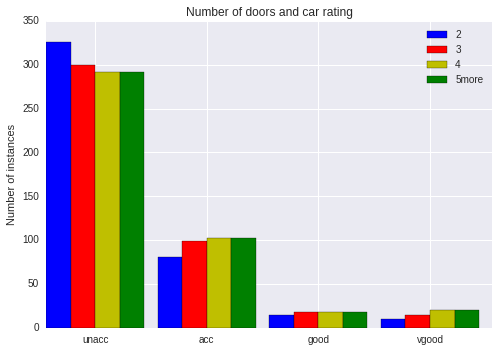

In [617]:
N = 4

ind = np.arange(N)
width = 0.22
fig, ax = plt.subplots()


two = (326,81,15,10)
rect1 = ax.bar(ind,two,width, color = 'b')

three = (300,99,18,15)
rect2 = ax.bar(ind+width,three,width, color = 'r')

four = (292,102,18,20)
rect3 = ax.bar(ind+(2*width),four,width, color = 'y')

five_more = (292,102,18,20)
rect4 = ax.bar(ind+(3*width),five_more,width, color = 'g')

ax.set_ylabel('Number of instances')
ax.set_title('Number of doors and car rating')
ax.set_xticks(ind+(2*width))
ax.set_xticklabels(('unacc','acc','good','vgood'))

ax.legend((rect1[0],rect2[1],rect3[2],rect4[3]),('2','3','4','5more'))


#### Observation: Rating of cars based on doors are in all categories. Cars with 2,3,4 and more doors all have high unacceptable instances.
#### Thought: Number of doors does not seem to be a big factor in rating a car.

### Does capacity of a car (number of people in a car) affect car rating?

In [618]:
p_2_un = 0
p_2_ac = 0
p_2_go = 0
p_2_vg = 0

p_4_un = 0
p_4_ac = 0
p_4_go = 0
p_4_vg = 0

p_5_un = 0
p_5_ac = 0
p_5_go = 0
p_5_vg = 0

for val in c_df.iterrows():           
    if (val[1].persons == '2' and val[1].category == 'unacc'):
        p_2_un += 1
    elif (val[1].persons == '2' and val[1].category == 'acc'):
        p_2_ac += 1
    elif (val[1].persons == '2' and val[1].category == 'good'):
        p_2_go += 1
    elif (val[1].persons == '2' and val[1].category == 'vgood'):
        p_2_vg += 1
        
        
    elif (val[1].persons == '4' and val[1].category == 'unacc'):
        p_4_un += 1
    elif (val[1].persons == '4' and val[1].category == 'acc'):
        p_4_ac += 1
    elif (val[1].persons == '4' and val[1].category == 'good'):
        p_4_go += 1
    elif (val[1].persons == '4' and val[1].category == 'vgood'):
        p_4_vg += 1
    
    elif (val[1].persons == 'more' and val[1].category == 'unacc'):
         p_5_un += 1
    elif (val[1].persons == 'more' and val[1].category == 'acc'):
        p_5_ac += 1
    elif (val[1].persons == 'more' and val[1].category == 'good'):
        p_5_go += 1
    else:
        p_5_vg += 1
        

print("2 person and unacceptable: ", p_2_un)
print("2 person and acceptable : ", p_2_ac)
print("2 person and good : ", p_2_go)
print("2 person and vgood : ", p_2_vg)
print()

print("4 person and unacceptable: ", p_4_un)
print("4 person and acceptable : ", p_4_ac)
print("4 person and good : ", p_4_go)
print("4 person and vgood : ", p_4_vg)
print()

print("More than 4 and unacceptable: ", p_5_un)
print("More than 4 and acceptable : ", p_5_ac)
print("More than 4 and good : ", p_5_go)
print("More than 4 and vgood : ", p_5_vg)


2 person and unacceptable:  576
2 person and acceptable :  0
2 person and good :  0
2 person and vgood :  0

4 person and unacceptable:  312
4 person and acceptable :  198
4 person and good :  36
4 person and vgood :  30

More than 4 and unacceptable:  322
More than 4 and acceptable :  186
More than 4 and good :  33
More than 4 and vgood :  35


#### Observation: Capcaity of a car seems to be a huge factor in rating a car. Cars with 2 person capacity is unacceptable.

### Stacked Bar Graph represeting capacity of a car and rating it gets 

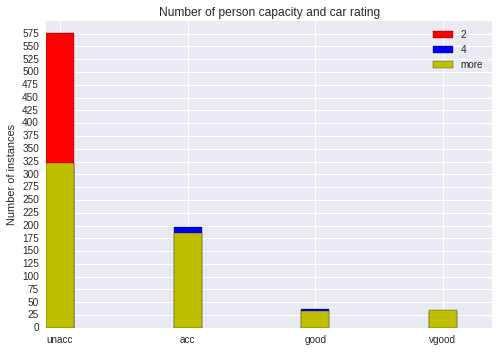

In [619]:
N = 4

ind = np.arange(N)
width = 0.22

two_pee = (576,0,0,0)
four_pee = (312,198,36,30)
more = (322,186,33,35)

p1 = plt.bar(ind,two_pee,width,color='r')
p2 = plt.bar(ind,four_pee,width,color='b')
p3 = plt.bar(ind,more,width,color='y')

plt.ylabel('Number of instances')
plt.title('Number of person capacity and car rating')
plt.xticks(ind+width/2.,('unacc','acc','good','vgood'))
plt.yticks(np.arange(0, 600, 25))

plt.legend((p1[0],p2[1],p3[2]),('2','4','more'))


### Does safety of a car affects rating of a car?

In [620]:
s_l_un = 0
s_l_ac = 0
s_l_go = 0
s_l_vg = 0

s_m_un = 0
s_m_ac = 0
s_m_go = 0
s_m_vg = 0

s_h_un = 0
s_h_ac = 0
s_h_go = 0
s_h_vg = 0

for val in c_df.iterrows():   
    if (val[1].safety == 'low' and val[1].category == 'unacc'):
        s_l_un += 1
    elif (val[1].safety == 'low' and val[1].category == 'acc'):
        s_l_ac += 1
    elif (val[1].safety == 'low' and val[1].category == 'good'):
        s_l_go += 1
    elif (val[1].safety == 'low' and val[1].category == 'vgood'):
        s_l_vg += 1
        
        
    elif (val[1].safety == 'med' and val[1].category == 'unacc'):
        s_m_un += 1
    elif (val[1].persons == 'med' and val[1].category == 'acc'):
        s_m_ac += 1
    elif (val[1].persons == 'med' and val[1].category == 'good'):
        s_m_go += 1
    elif (val[1].persons == 'med' and val[1].category == 'vgood'):
        s_m_vg += 1
    
    elif (val[1].safety == 'high' and val[1].category == 'unacc'):
         s_h_un += 1
    elif (val[1].persons == 'high' and val[1].category == 'acc'):
        s_h_ac += 1
    elif (val[1].persons == 'high' and val[1].category == 'good'):
        s_h_go += 1
    else:
        s_h_vg += 1
        

print("Low safety and unacceptable: ", s_l_un)
print("Low safety and acceptable : ", s_l_ac)
print("Low safety and good : ", s_l_go)
print("Low safety and vgood : ", s_l_vg)
print()

print("Medium safety and unacceptable: ", s_m_un)
print("Medium safety and acceptable : ", s_m_ac)
print("Medium safety and good : ", s_m_go)
print("Medium safety and vgood : ", s_m_vg)
print()

print("High safety and unacceptable: ", s_h_un)
print("High safety and acceptable : ", s_h_ac)
print("High safety and good : ", s_h_go)
print("High safety and vgood : ", s_h_vg)


Low safety and unacceptable:  576
Low safety and acceptable :  0
Low safety and good :  0
Low safety and vgood :  0

Medium safety and unacceptable:  357
Medium safety and acceptable :  0
Medium safety and good :  0
Medium safety and vgood :  0

High safety and unacceptable:  277
High safety and acceptable :  0
High safety and good :  0
High safety and vgood :  518


#### Observation: Low and medium safety cars all unacceptable

### Stacked Bar Graph represeting safety of a car and rating it gets 

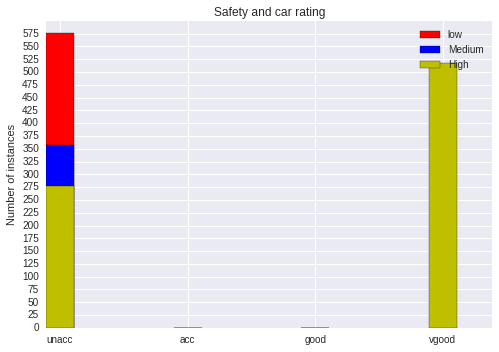

In [621]:
N = 4

ind = np.arange(N)
width = 0.22

low = (576,0,0,0)
med = (357,0,0,0)
high = (277,0,0,518)

p1 = plt.bar(ind,low,width,color='r')
p2 = plt.bar(ind,med,width,color='b')
p3 = plt.bar(ind,high,width,color='y')

plt.ylabel('Number of instances')
plt.title('Safety and car rating')
plt.xticks(ind+width/2.,('unacc','acc','good','vgood'))
plt.yticks(np.arange(0, 600, 25))

plt.legend((p1[0],p2[1],p3[2]),('low','Medium','High'))


#### Observations: 
* low and medium safety cars falls straightly into unacceptable. High safety cars are acceptable **however** substantial part is also in unacceptable category as well. other factor?
* Safety attributes fall in either unacceptable or vgood category. 
* No intermediate ratings (acc, good). 
#### Thought: we don't take risk with our lives.

### Low Safety and only 2 people capacity cars seems to be an important factor in rating cars 

In [622]:
#c_df.info()

### Converting dataset to numerical ratings

In [623]:
#Maintenance and buying
c_df = c_df.replace('vhigh',4)
c_df = c_df.replace('high',3)
c_df = c_df.replace('med',2)
c_df = c_df.replace('low',1)

#Doors and person
c_df = c_df.replace('5more',6)
c_df = c_df.replace('more',5)

#Safety and Size of Luggage boot
c_df = c_df.replace('big',3)
c_df = c_df.replace('med',2)
c_df = c_df.replace('small',1)

#class
c_df = c_df.replace('unacc',1)
c_df = c_df.replace('acc',2)
c_df = c_df.replace('good',3)
c_df = c_df.replace('vgood',4)


#c_df.head()
c_df



,buying,maint,doors,persons,lug_boot,safety,category
0,4,4,2,2,1,1,1
1,4,4,2,2,1,2,1
2,4,4,2,2,1,3,1
3,4,4,2,2,2,1,1
4,4,4,2,2,2,2,1
5,4,4,2,2,2,3,1
6,4,4,2,2,3,1,1
7,4,4,2,2,3,2,1
8,4,4,2,2,3,3,1
9,4,4,2,4,1,1,1


In [624]:
#extracting c_df values
car = c_df.values 
car

array([[4, 4, '2', ..., 1, 1, 1],
       [4, 4, '2', ..., 1, 2, 1],
       [4, 4, '2', ..., 1, 3, 1],
       ..., 
       [1, 1, 6, ..., 3, 1, 1],
       [1, 1, 6, ..., 3, 2, 3],
       [1, 1, 6, ..., 3, 3, 4]], dtype=object)

In [625]:
#splitting the data to attributes and label
X,y = car[:,:6],car[:,6]
X

array([[4, 4, '2', '2', 1, 1],
       [4, 4, '2', '2', 1, 2],
       [4, 4, '2', '2', 1, 3],
       ..., 
       [1, 1, 6, 5, 3, 1],
       [1, 1, 6, 5, 3, 2],
       [1, 1, 6, 5, 3, 3]], dtype=object)

In [626]:
y

array([1, 1, 1, ..., 1, 3, 4], dtype=object)

In [627]:
#converting values are int
X,y = X.astype(int), y.astype(int)
X

array([[4, 4, 2, 2, 1, 1],
       [4, 4, 2, 2, 1, 2],
       [4, 4, 2, 2, 1, 3],
       ..., 
       [1, 1, 6, 5, 3, 1],
       [1, 1, 6, 5, 3, 2],
       [1, 1, 6, 5, 3, 3]])

In [628]:
y

array([1, 1, 1, ..., 1, 3, 4])

In [629]:
#cross validation
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)


### Perceptron

In [630]:
#Using Perceptron
percep = Perceptron()
percep.fit(X_train, y_train)


Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      n_iter=5, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [631]:
result = percep.predict([[4,4,2,2,1,1]])#,[1,1,6,5,3,3]])
car_eval = {1:'unacceptable',2:'acceptable',3:'good',4:'vgood'}
print("Predicted result", result)
i = int(result)
print(car_eval[i])



Predicted result [1]
unacceptable


In [632]:
X_test #30%

array([[1, 4, 2, 5, 2, 2],
       [4, 3, 2, 4, 3, 2],
       [3, 2, 2, 2, 1, 1],
       ..., 
       [3, 1, 6, 2, 1, 2],
       [2, 3, 6, 5, 2, 3],
       [1, 3, 3, 5, 2, 2]])

In [633]:
result = percep.predict(X_test)
count = 0
for i in range(len(result)):
    if(result[i] == y_test[i]):
        count+=1
print("Correct prediction: ",count)
print("Total test instances: ",len(X_test))
print("Percentage correct: %2.2f" %((count/len(X_test))*100))


Correct prediction:  405
Total test instances:  519
Percentage correct: 78.03


In [634]:
y_pred = percep.predict(X_test)
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          1       0.83      0.98      0.90       363
          2       0.55      0.44      0.49       115
          3       0.00      0.00      0.00        25
          4       0.00      0.00      0.00        16

avg / total       0.70      0.78      0.74       519



### Observation: Perceptron cannot detect rating of 3 and 4, mostly confuses to rating of 2

In [635]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm

array([[354,   9,   0,   0],
       [ 64,  51,   0,   0],
       [  7,  18,   0,   0],
       [  1,  15,   0,   0]])

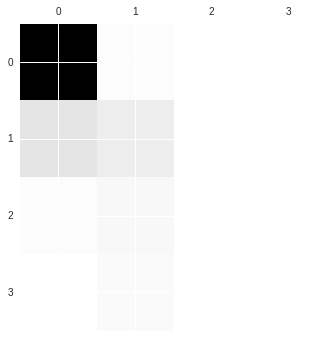

In [636]:
plt.matshow(cm)
plt.show()

### Support Vector Classifier

In [637]:
svc = SVC()
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [638]:
pred = svc.predict(X_test)
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          1       0.99      0.98      0.98       363
          2       0.88      0.93      0.90       115
          3       0.86      0.76      0.81        25
          4       0.88      0.88      0.88        16

avg / total       0.95      0.95      0.95       519



### Observation: prescision of 95% with SVC. 

In [639]:
cm = metrics.confusion_matrix(y_test, pred)
cm

array([[354,   9,   0,   0],
       [  5, 107,   3,   0],
       [  0,   4,  19,   2],
       [  0,   2,   0,  14]])

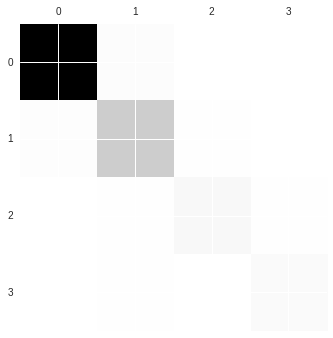

In [640]:
plt.matshow(cm)
plt.show()

### Naive Bayes

In [641]:
nb = MultinomialNB()
nb.fit(X_train,y_train)
pred = nb.predict(X_test)
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          1       0.70      1.00      0.82       363
          2       0.00      0.00      0.00       115
          3       0.00      0.00      0.00        25
          4       0.00      0.00      0.00        16

avg / total       0.49      0.70      0.58       519



#### Observation: precision of 49%. supports categoy 1 only. In Naive Bayes there is a strong independence(naive) assupmption between features.

In [642]:
cm = metrics.confusion_matrix(y_test, pred)
cm

array([[363,   0,   0,   0],
       [115,   0,   0,   0],
       [ 24,   1,   0,   0],
       [ 16,   0,   0,   0]])

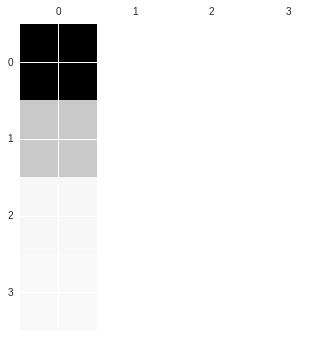

In [643]:
plt.matshow(cm)
plt.show()

### Random Forest Classifier

In [644]:

clf = RandomForestClassifier(n_estimators = 20)#number of trees in the forest
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [645]:
clf.score(X_test,y_test) #Returns the mean accuracy on the given test data and labels.

0.97109826589595372

#### RandomForestClassifier has the least misclassification of 3% when n_estimator ( number of trees) = 20

### What are the strongest attributes affecting car evaluation?
### Taking only safety of a car as a predictive variable

In [668]:
X_safety,y_class = c_df.iloc[0:1728,[5]].values,c_df.iloc[0:1728,[6]].values


In [669]:
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_safety,y_class)
X_s_train

array([[1],
       [3],
       [2],
       ..., 
       [2],
       [1],
       [1]])

### Perceptron

In [670]:
percep = Perceptron()
percep.fit(X_s_train,y_s_train)


Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      n_iter=5, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [671]:
y_s_pred = percep.predict(X_s_test)
print(classification_report(y_s_test,y_s_pred))

             precision    recall  f1-score   support

          1       0.69      1.00      0.81       296
          2       0.00      0.00      0.00       106
          3       0.00      0.00      0.00        15
          4       0.00      0.00      0.00        15

avg / total       0.47      0.69      0.56       432



#### Observation: all attributes (70%) while 1 attribute 47%

In [672]:
cm = metrics.confusion_matrix(y_s_test,y_s_pred)
cm

array([[296,   0,   0,   0],
       [106,   0,   0,   0],
       [ 15,   0,   0,   0],
       [ 15,   0,   0,   0]])

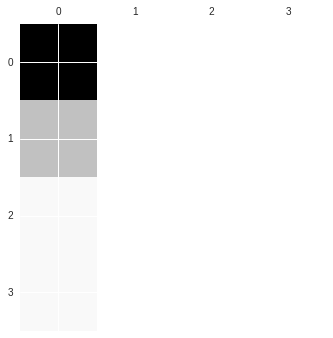

In [673]:
plt.matshow(cm)
plt.show()

#### Observation: cannot detect category 2,3 and 4

In [652]:
svc = SVC()
svc.fit(X_s_train,y_s_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [653]:
pred = svc.predict(X_s_test)
print(classification_report(y_s_test,pred))

             precision    recall  f1-score   support

          1       0.72      1.00      0.84       310
          2       0.00      0.00      0.00        94
          3       0.00      0.00      0.00        11
          4       0.00      0.00      0.00        17

avg / total       0.51      0.72      0.60       432



#### Observation: supports just class 1 unacceptable

In [654]:
nb = MultinomialNB()
nb.fit(X_s_train,y_s_train)
pred = nb.predict(X_s_test)
print(classification_report(y_s_test,pred))

             precision    recall  f1-score   support

          1       0.72      1.00      0.84       310
          2       0.00      0.00      0.00        94
          3       0.00      0.00      0.00        11
          4       0.00      0.00      0.00        17

avg / total       0.51      0.72      0.60       432



In [655]:
cm = metrics.confusion_matrix(y_s_test,y_s_pred)
cm

array([[310,   0,   0,   0],
       [ 94,   0,   0,   0],
       [ 11,   0,   0,   0],
       [ 17,   0,   0,   0]])

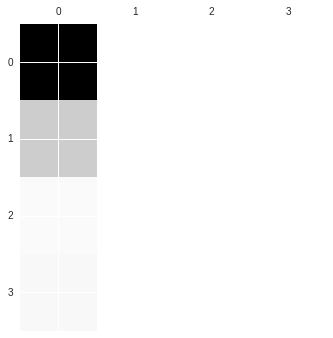

In [656]:
plt.matshow(cm)
plt.show()

In [657]:
clf = RandomForestClassifier(n_estimators = 20)#number of trees in the forest
clf.fit(X_s_train,y_s_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [658]:
clf.score(X_s_test,y_s_test) 

0.71759259259259256

#### Observation: RandomForestClassifier again has the highest precision

### Taking number of person and safety as predictive variable

In [659]:
X_sp,y_sp = c_df.iloc[0:1728,[2,5]].values,c_df.iloc[0:1728,[6]].values
X_sp_train, X_sp_test, y_sp_train, y_sp_test = train_test_split(X_sp,y_sp)
X_sp_train

array([['3', 3],
       ['3', 1],
       ['3', 1],
       ..., 
       [6, 3],
       ['3', 2],
       ['2', 3]], dtype=object)

In [660]:
percep = Perceptron()
percep.fit(X_sp_train,y_sp_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      n_iter=5, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [661]:
y_sp_pred = percep.predict(X_sp_test)
print(classification_report(y_sp_test,y_sp_pred))

             precision    recall  f1-score   support

          1       0.82      0.77      0.80       296
          2       0.36      0.59      0.44        94
          3       0.00      0.00      0.00        16
          4       0.00      0.00      0.00        26

avg / total       0.64      0.66      0.64       432



#### Observation: better precision (64%) than just safety attribute (47%)

In [662]:
cm = metrics.confusion_matrix(y_s_test,y_s_pred)
cm

array([[310,   0,   0,   0],
       [ 94,   0,   0,   0],
       [ 11,   0,   0,   0],
       [ 17,   0,   0,   0]])

#### Perceptron classifier  cannot classify class 2, 3 and 4

In [663]:
svc = SVC()
svc.fit(X_sp_train,y_sp_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [664]:
pred_sp = svc.predict(X_sp_test)
print(classification_report(y_sp_test,pred_sp))

             precision    recall  f1-score   support

          1       0.69      1.00      0.81       296
          2       0.00      0.00      0.00        94
          3       0.00      0.00      0.00        16
          4       0.00      0.00      0.00        26

avg / total       0.47      0.69      0.56       432



#### Observation: classification similar to perceptron

In [665]:
nb = MultinomialNB()
nb.fit(X_sp_train,y_sp_train)
pred_sp = nb.predict(X_sp_test)
print(classification_report(y_sp_test,pred_sp))

             precision    recall  f1-score   support

          1       0.69      1.00      0.81       296
          2       0.00      0.00      0.00        94
          3       0.00      0.00      0.00        16
          4       0.00      0.00      0.00        26

avg / total       0.47      0.69      0.56       432



#### Observation: not improved precision than taking only safety (51%) as predictive variable

In [666]:
clf = RandomForestClassifier(n_estimators = 20)#number of trees in the forest
clf.fit(X_sp_train,y_sp_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [667]:
clf.score(X_sp_test,y_sp_test) 

0.68518518518518523

#### Observation: Decrease in precsion from 71% to 68%

### Summary: 
* The car rating is based on more than safety and car capacity.  Cost  may seem to play a significant part as well. 
* Given time: use specific combination of predictaable variables such as high cost with high safety and 4 person capacity, low cost, high safety and 2 person capacity, etc. 
* Newer dataset
* Thought: With just safety or safety and car capacity, precision decreses.Cost does seems to play import factor when rating cars.